### Import libraries

In [1]:
import torch
import warnings
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

from tqdm import tqdm
from PIL import Image
from torch.utils.data import DataLoader
from datasets.gta5 import GTA5
from datasets.cityscapes import CityScapes
from torchvision.transforms import ToPILImage
from torchvision import transforms

from utils import fast_hist, per_class_iou
from models.bisenet.build_bisenet import BiSeNet

warnings.filterwarnings("ignore")

### Training

In [2]:
device = torch.device("cuda")
# Load model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
# Set model to training mode
model.train()

# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5')
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

# Loss function
criterion = nn.CrossEntropyLoss(ignore_index=255)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Training loop
for epoch in range(50):
    hist = np.zeros((19, 19))

    # Iterate over the dataset
    for i, (images, labels) in enumerate(tqdm(dataloader)):
        # Move the data to the device
        images = images.to(device)
        label = labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(images)[0]
        # Compute the loss
        loss = criterion(output, label)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Compute the predictions
        pred = output.argmax(dim=1)

        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    # Print the loss and mIoU
    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model
torch.save(model.state_dict(), 'models/bisenet/bisenet_gta5_basic.pth')

100%|██████████| 313/313 [02:31<00:00,  2.07it/s]


Epoch: 0, Loss: 0.3801037669181824, mIoU: 0.22368721838324623


100%|██████████| 313/313 [02:31<00:00,  2.06it/s]


Epoch: 1, Loss: 0.31866154074668884, mIoU: 0.321205931233896


100%|██████████| 313/313 [02:29<00:00,  2.09it/s]


Epoch: 2, Loss: 0.40770044922828674, mIoU: 0.3739996724125226


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 3, Loss: 0.2605661451816559, mIoU: 0.401459788835925


100%|██████████| 313/313 [02:27<00:00,  2.12it/s]


Epoch: 4, Loss: 0.24555213749408722, mIoU: 0.4258886618406102


100%|██████████| 313/313 [02:22<00:00,  2.19it/s]


Epoch: 5, Loss: 0.22673168778419495, mIoU: 0.447062215967126


100%|██████████| 313/313 [02:27<00:00,  2.12it/s]


Epoch: 6, Loss: 0.2540892958641052, mIoU: 0.4643089535443475


100%|██████████| 313/313 [02:27<00:00,  2.12it/s]


Epoch: 7, Loss: 0.19198766350746155, mIoU: 0.4828811216960065


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 8, Loss: 0.24529382586479187, mIoU: 0.49399925795268235


100%|██████████| 313/313 [02:27<00:00,  2.12it/s]


Epoch: 9, Loss: 0.37397313117980957, mIoU: 0.5051966009267328


100%|██████████| 313/313 [02:27<00:00,  2.12it/s]


Epoch: 10, Loss: 0.2435189038515091, mIoU: 0.5140304779044668


100%|██████████| 313/313 [02:23<00:00,  2.19it/s]


Epoch: 11, Loss: 0.26414382457733154, mIoU: 0.5219843781075266


100%|██████████| 313/313 [02:28<00:00,  2.11it/s]


Epoch: 12, Loss: 0.25275343656539917, mIoU: 0.53010910286267


100%|██████████| 313/313 [02:27<00:00,  2.12it/s]


Epoch: 13, Loss: 0.27937495708465576, mIoU: 0.5362251117382759


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 14, Loss: 0.17720136046409607, mIoU: 0.5432505649748893


100%|██████████| 313/313 [02:28<00:00,  2.11it/s]


Epoch: 15, Loss: 0.1308116763830185, mIoU: 0.5498157425190386


100%|██████████| 313/313 [02:28<00:00,  2.11it/s]


Epoch: 16, Loss: 0.21421276032924652, mIoU: 0.5523525902560862


100%|██████████| 313/313 [02:23<00:00,  2.19it/s]


Epoch: 17, Loss: 0.20536203682422638, mIoU: 0.5585762130484857


100%|██████████| 313/313 [02:28<00:00,  2.11it/s]


Epoch: 18, Loss: 0.1272987723350525, mIoU: 0.5609337305786574


100%|██████████| 313/313 [02:26<00:00,  2.14it/s]


Epoch: 19, Loss: 0.18700411915779114, mIoU: 0.5671952024476205


100%|██████████| 313/313 [02:16<00:00,  2.29it/s]


Epoch: 20, Loss: 0.23046629130840302, mIoU: 0.5751518339628646


100%|██████████| 313/313 [02:23<00:00,  2.19it/s]


Epoch: 21, Loss: 0.22970373928546906, mIoU: 0.5780769864526271


100%|██████████| 313/313 [02:22<00:00,  2.19it/s]


Epoch: 22, Loss: 0.1668122112751007, mIoU: 0.5810084966109343


100%|██████████| 313/313 [02:17<00:00,  2.28it/s]


Epoch: 23, Loss: 0.14681871235370636, mIoU: 0.5854393999496781


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 24, Loss: 0.166661337018013, mIoU: 0.5877278975193412


100%|██████████| 313/313 [02:23<00:00,  2.18it/s]


Epoch: 25, Loss: 0.18211913108825684, mIoU: 0.5895724304462817


100%|██████████| 313/313 [02:16<00:00,  2.29it/s]


Epoch: 26, Loss: 0.20948490500450134, mIoU: 0.5921679901627227


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 27, Loss: 0.14119556546211243, mIoU: 0.5971655560463328


100%|██████████| 313/313 [02:22<00:00,  2.19it/s]


Epoch: 28, Loss: 0.14209358394145966, mIoU: 0.5984811675239959


100%|██████████| 313/313 [02:18<00:00,  2.26it/s]


Epoch: 29, Loss: 0.14316079020500183, mIoU: 0.6007601134064633


100%|██████████| 313/313 [02:23<00:00,  2.18it/s]


Epoch: 30, Loss: 0.18592584133148193, mIoU: 0.6023964392836887


100%|██████████| 313/313 [02:25<00:00,  2.16it/s]


Epoch: 31, Loss: 0.17745456099510193, mIoU: 0.6062040275708384


100%|██████████| 313/313 [02:17<00:00,  2.28it/s]


Epoch: 32, Loss: 0.14888402819633484, mIoU: 0.6081885891349404


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 33, Loss: 0.13286632299423218, mIoU: 0.6086667279171962


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 34, Loss: 0.25170978903770447, mIoU: 0.6123758650131107


100%|██████████| 313/313 [02:16<00:00,  2.29it/s]


Epoch: 35, Loss: 0.19484610855579376, mIoU: 0.6130455755469029


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 36, Loss: 0.13915981352329254, mIoU: 0.614511495849754


100%|██████████| 313/313 [02:22<00:00,  2.20it/s]


Epoch: 37, Loss: 0.5168779492378235, mIoU: 0.6193776028406514


100%|██████████| 313/313 [02:16<00:00,  2.29it/s]


Epoch: 38, Loss: 0.1453533172607422, mIoU: 0.6203377057342161


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 39, Loss: 0.20393343269824982, mIoU: 0.6217547548568761


100%|██████████| 313/313 [02:26<00:00,  2.14it/s]


Epoch: 40, Loss: 0.11698288470506668, mIoU: 0.6256243363692809


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 41, Loss: 0.11727704107761383, mIoU: 0.6282865497474555


100%|██████████| 313/313 [02:27<00:00,  2.13it/s]


Epoch: 42, Loss: 0.09029675275087357, mIoU: 0.6284283511808236


100%|██████████| 313/313 [02:49<00:00,  1.85it/s]


Epoch: 43, Loss: 0.13493990898132324, mIoU: 0.6314835087277558


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 44, Loss: 0.12235861271619797, mIoU: 0.6336323691727079


100%|██████████| 313/313 [02:28<00:00,  2.11it/s]


Epoch: 45, Loss: 0.1423095166683197, mIoU: 0.6356662528819035


100%|██████████| 313/313 [02:28<00:00,  2.11it/s]


Epoch: 46, Loss: 0.18308214843273163, mIoU: 0.63836198174234


100%|██████████| 313/313 [02:22<00:00,  2.19it/s]


Epoch: 47, Loss: 0.12542925775051117, mIoU: 0.6404072899287977


100%|██████████| 313/313 [02:28<00:00,  2.11it/s]


Epoch: 48, Loss: 0.11742056161165237, mIoU: 0.6421486377134188


100%|██████████| 313/313 [02:28<00:00,  2.11it/s]

Epoch: 49, Loss: 0.14590001106262207, mIoU: 0.6469259221299423


### Evaluation - GTA 5 (Training Set)

0it [00:00, ?it/s]


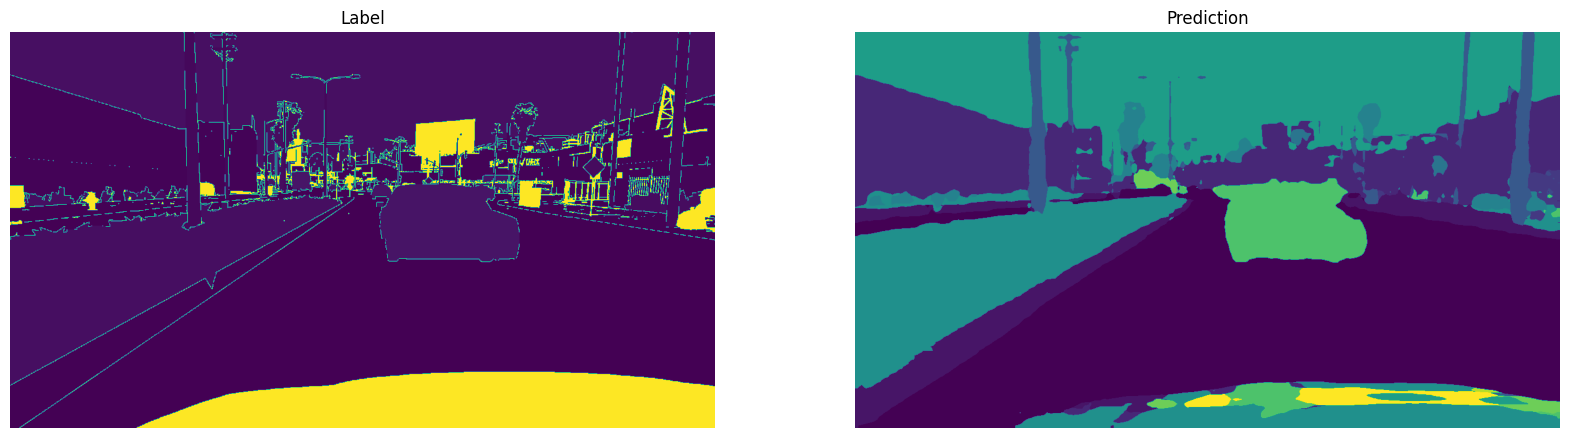

In [4]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5_basic.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

for i, (image, label) in tqdm(enumerate(dataloader)):
    # Move the data to the device
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Stop after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()

### Evaluation - CityScapes

In [2]:
# These are the class labels for the Cityscapes dataset
class_labels = {
    0: 'road',
    1: 'sidewalk',
    2: 'building',
    3: 'wall',
    4: 'fence',
    5: 'pole',
    6: 'traffic light',
    7: 'traffic sign',
    8: 'vegetation',
    9: 'terrain',
    10: 'sky',
    11: 'person',
    12: 'rider',
    13: 'car',
    14: 'truck',
    15: 'bus',
    16: 'train',
    17: 'motorcycle',
    18: 'bicycle'
}

In [4]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5_basic.pth'))
# Set model to evaluation mode
model.eval()

## Get the miou for the Cityscapes dataset in the validation split
# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=6)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    
# Calculate the mean IoU
miou = np.mean(per_class_iou(hist))
print(f"Mean IoU: {miou:.4f} \n")

class_ious = per_class_iou(hist)
# Print per-class IoU
for i, iou in enumerate(class_ious):
    print(f"{class_labels[i]} IoU: {iou:.4f}")

100%|██████████| 500/500 [00:06<00:00, 78.95it/s]

Mean IoU: 0.1839 

road IoU: 0.4886
sidewalk IoU: 0.0357
building IoU: 0.5488
wall IoU: 0.0849
fence IoU: 0.0346
pole IoU: 0.1273
traffic light IoU: 0.0637
traffic sign IoU: 0.0482
vegetation IoU: 0.6610
terrain IoU: 0.1672
sky IoU: 0.5454
person IoU: 0.2653
rider IoU: 0.0000
car IoU: 0.2762
truck IoU: 0.0753
bus IoU: 0.0656
train IoU: 0.0000
motorcycle IoU: 0.0049
bicycle IoU: 0.0010


### Example

0it [00:00, ?it/s]


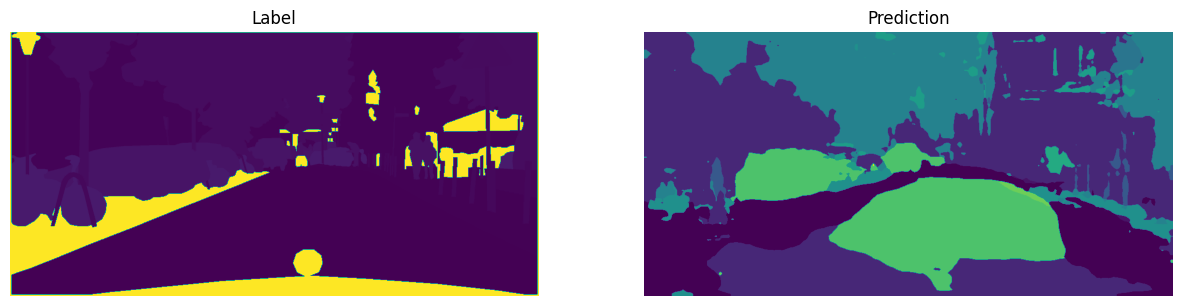

In [11]:
# Get the device
device = torch.device("cuda")

# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5_basic.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

for i, (image, label) in tqdm(enumerate(dataloader)):
    # Move the data to the device
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Stop after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()